In [34]:
import warnings

from warnings import filterwarnings;
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
df=pd.read_csv('world_real_estate_data(147k).csv')
UAE_Real_Estate=pd.read_csv('bayut_selling_properties.csv')





In [71]:
df_UAE=df[df['country'] == 'UAE']


In [72]:
df_UAE = df_UAE.rename(columns={
    'apartment_bedrooms': 'beds',
    'apartment_bathrooms': 'baths',
    'apartment_total_area': 'area_sqm',
    'price_in_USD': 'price_USD',
    'location': 'address',
    'building_construction_year': 'year_of_completion'
})

In [73]:
df_UAE.shape

(2675, 14)

In [74]:
df_UAE.isnull().sum()

title                       0
country                     0
address                     0
year_of_completion       1314
building_total_floors    1643
apartment_floor          2078
apartment_rooms           462
beds                     1135
baths                    1499
area_sqm                  104
apartment_living_area    2622
price_USD                   1
image                       0
url                         0
dtype: int64

In [75]:
df_UAE.drop_duplicates(subset=['address','area_sqm','price_USD'],inplace=True)


In [76]:
df_UAE.shape

(2590, 14)

In [77]:
# Data Cleanup 
df_UAE['year_of_completion']=pd.to_datetime(df_UAE['year_of_completion'])

In [78]:
df_UAE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2590 entries, 14 to 147483
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  2590 non-null   object        
 1   country                2590 non-null   object        
 2   address                2590 non-null   object        
 3   year_of_completion     1301 non-null   datetime64[ns]
 4   building_total_floors  1015 non-null   float64       
 5   apartment_floor        589 non-null    float64       
 6   apartment_rooms        2145 non-null   float64       
 7   beds                   1498 non-null   float64       
 8   baths                  1136 non-null   float64       
 9   area_sqm               2488 non-null   object        
 10  apartment_living_area  53 non-null     object        
 11  price_USD              2589 non-null   float64       
 12  image                  2590 non-null   object        
 13  url  

In [79]:
df_UAE.describe()

,year_of_completion,building_total_floors,apartment_floor,apartment_rooms,beds,baths,price_USD
count,1301,1015.000000,589.000000,2145.000000,1498.000000,1136.000000,2.589000e+03
mean,1970-01-01 00:00:00.000002023,27.360591,16.624788,2.689044,1.958611,2.111796,1.289098e+06
min,1970-01-01 00:00:00.000002009,1.000000,1.000000,-1.000000,1.000000,1.000000,6.050000e+04
25%,1970-01-01 00:00:00.000002022,10.000000,5.000000,2.000000,1.000000,1.000000,2.952530e+05
50%,1970-01-01 00:00:00.000002024,21.000000,11.000000,3.000000,2.000000,2.000000,5.130000e+05
75%,1970-01-01 00:00:00.000002025,45.000000,21.000000,3.000000,2.000000,3.000000,9.308320e+05
max,1970-01-01 00:00:00.000002028,124.000000,202.000000,10.000000,9.000000,9.000000,2.913102e+07
std,NaN,20.956234,17.209102,1.396222,1.103657,1.323725,2.560386e+06


In [80]:

df_UAE['year'] = df_UAE['year_of_completion'].dt.year

In [81]:
df_UAE

,title,country,address,year_of_completion,building_total_floors,apartment_floor,apartment_rooms,beds,baths,area_sqm,apartment_living_area,price_USD,image,url,year
14,"1 room studio apartment 38 m² in UAE, UAE",UAE,UAE,1970-01-01 00:00:00.000002024,6.0,NaN,1.0,1.0,1.0,38 m²,38 m²,97930.0,https://realting.com/uploads/bigSlider/6e3/0b5...,https://realting.com/property-for-sale/united-...,1970.0
130206,"1 room apartment 90 m² in Dubai, UAE",UAE,"Dubai, UAE",NaT,NaN,NaN,NaN,1.0,1.0,90 m²,NaN,244755.0,https://realting.com/uploads/bigSlider/58e/bb2...,https://realting.com/property-for-sale/united-...,NaN
130207,"Apartment 1 bathroom 35 m² in Dubai, UAE",UAE,"Dubai, UAE",NaT,NaN,NaN,NaN,NaN,1.0,35 m²,NaN,157906.0,https://realting.com/uploads/bigSlider/d5d/b56...,https://realting.com/property-for-sale/united-...,NaN
130223,"1 room apartment 78 m² in Dubai, UAE",UAE,"Dubai, UAE",NaT,NaN,NaN,NaN,1.0,2.0,78 m²,NaN,233000.0,https://realting.com/uploads/bigSlider/a99/2d7...,https://realting.com/property-for-sale/united-...,NaN
130224,"2 room apartment 70 m² in Dubai, UAE",UAE,"Dubai, UAE",1970-01-01 00:00:00.000002022,30.0,3.0,2.0,2.0,1.0,70 m²,NaN,250000.0,https://realting.com/uploads/bigSlider/54a/b72...,https://realting.com/property-for-sale/united-...,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147477,"1 room apartment 35 m² in Dubai, UAE",UAE,"Dubai, UAE",1970-01-01 00:00:00.000002022,NaN,NaN,1.0,NaN,NaN,35 m²,NaN,168110.0,https://realting.com/uploads/bigSlider/666/963...,https://realting.com/property-for-sale/united-...,1970.0
147478,"1 room apartment 89 m² in Ajman, UAE",UAE,"Ajman Emirate, Ajman, UAE",1970-01-01 00:00:00.000002023,40.0,2.0,2.0,1.0,2.0,89 m²,NaN,113135.0,https://realting.com/uploads/bigSlider/294/cdc...,https://realting.com/property-for-sale/united-...,1970.0
147479,"1 room apartment 59 m² in Dubai, UAE",UAE,"Dubai, UAE",NaT,40.0,26.0,2.0,1.0,1.0,59 m²,NaN,136948.0,https://realting.com/uploads/bigSlider/666/6de...,https://realting.com/property-for-sale/united-...,NaN
147481,"1 room apartment 42 m² in Sharjah Emirate, UAE",UAE,"Sharjah Emirate, UAE",1970-01-01 00:00:00.000002025,6.0,NaN,2.0,1.0,1.0,42 m²,NaN,171233.0,https://realting.com/uploads/bigSlider/e31/f2d...,https://realting.com/property-for-sale/united-...,1970.0


In [82]:
numeric_df=df_UAE.select_dtypes(include=['float','int'])
corr_matrix=numeric_df.corr()

In [83]:
fig=px.imshow(corr_matrix,text_auto=True,aspect=True, title='Correlation Matrix'
,color_continuous_scale='RdBu_r')
plt.figure(figsize=(10, 10))
fig.show()


<Figure size 1000x1000 with 0 Axes>

In [84]:
df_UAE=df_UAE.fillna(0)

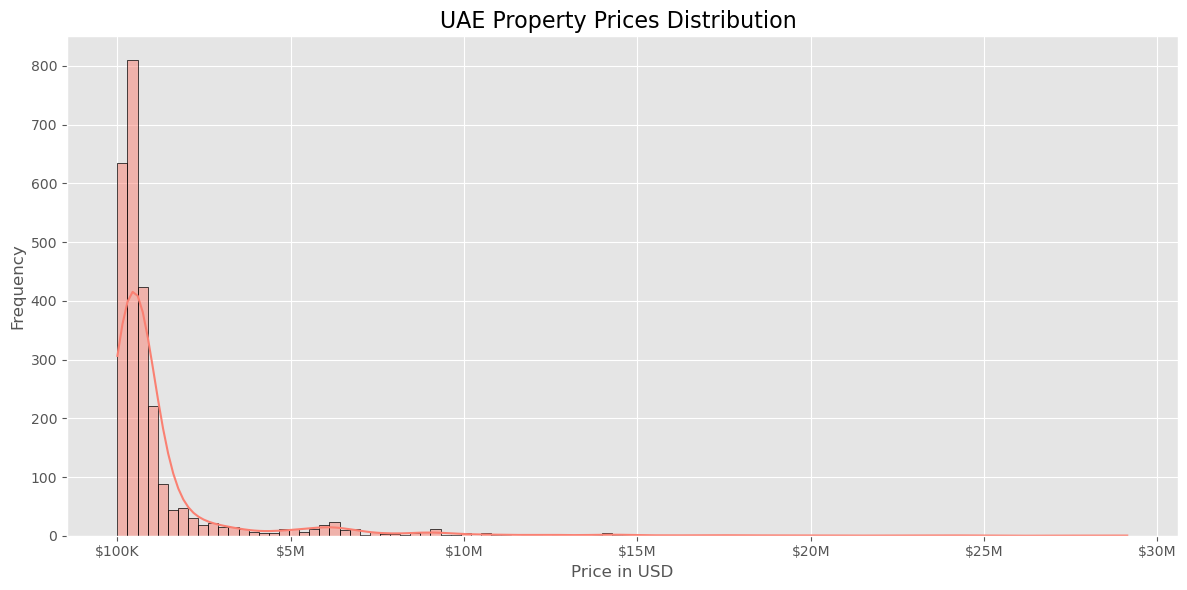

In [85]:
plt.figure(figsize=(12, 6))
sns.histplot(df_UAE['price_USD'], bins=100, color='salmon', edgecolor='black',kde=True)
plt.title('UAE Property Prices Distribution ', fontsize=16)
plt.xlabel('Price in USD')
plt.ylabel('Frequency')


#Converts numeric x-axis labels to human-readable money format
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M' 
                                            if x >= 1e6 else (f'${x/1e3:.0f}K' if x >= 1e3 else '$100K')))

plt.tight_layout()
plt.show()

In [86]:
UAE_Real_Estate.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'address',
       'furnishing', 'completion_status', 'post_date', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'city', 'country', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [88]:
UAE_Real_Estate.describe()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,4.138100e+04,41381.000000,41381.000000,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41363.000000,41363.000000
mean,3.788624e+06,2.190957,3.007540,9.292880e+04,681.112491,172.559073,13.212126,142.931273,2.304463,25.037851,55.158407
std,8.482870e+06,1.567855,1.785553,2.503703e+05,953.886883,353.899074,20.298365,248.719849,4.440953,0.437348,0.513871
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,1.100000e+06,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.026710,55.135252
50%,2.000000e+06,2.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.078641,55.245999
75%,3.600000e+06,3.000000,4.000000,1.243790e+05,2012.000000,198.000000,22.000000,211.000000,4.000000,25.189427,55.307913
max,4.825000e+08,11.000000,11.000000,2.807952e+07,2024.000000,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


In [89]:
UAE_Real_Estate.shape

(41381, 22)

In [90]:
UAE_Real_Estate.drop_duplicates(subset=['address', 'price'], inplace=True)



In [91]:
UAE_Real_Estate.shape

(31235, 22)

In [92]:
UAE_Real_Estate['total_building_area_sqft'] = pd.to_numeric(
    UAE_Real_Estate['total_building_area_sqft'], errors='coerce'
)

In [93]:
UAE_Real_Estate['total_building_area_sqft'].describe()

count    31235.000000
mean       148.538082
std        250.375265
min          0.000000
25%          0.000000
50%          0.000000
75%        226.000000
max        997.000000
Name: total_building_area_sqft, dtype: float64

In [94]:
# Remove all rows containing zeros in the specified columns
UAE_RealEstate = UAE_Real_Estate[(UAE_Real_Estate[['baths', 'total_floors', 'total_building_area_sqft']] != 0).all(axis=1)]

# Show the new size of the DataFrame after removing rows
print(UAE_RealEstate.shape)
print(UAE_RealEstate.info())


(13979, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 13979 entries, 2 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     13979 non-null  float64
 1   price_category            13979 non-null  object 
 2   type                      13979 non-null  object 
 3   beds                      13979 non-null  int64  
 4   baths                     13979 non-null  int64  
 5   address                   13979 non-null  object 
 6   furnishing                13979 non-null  object 
 7   completion_status         13979 non-null  object 
 8   post_date                 13979 non-null  object 
 9   average_rent              13979 non-null  int64  
 10  building_name             13979 non-null  object 
 11  year_of_completion        13979 non-null  int64  
 12  total_parking_spaces      13979 non-null  int64  
 13  total_floors              13979 non-null  int64  
 14 

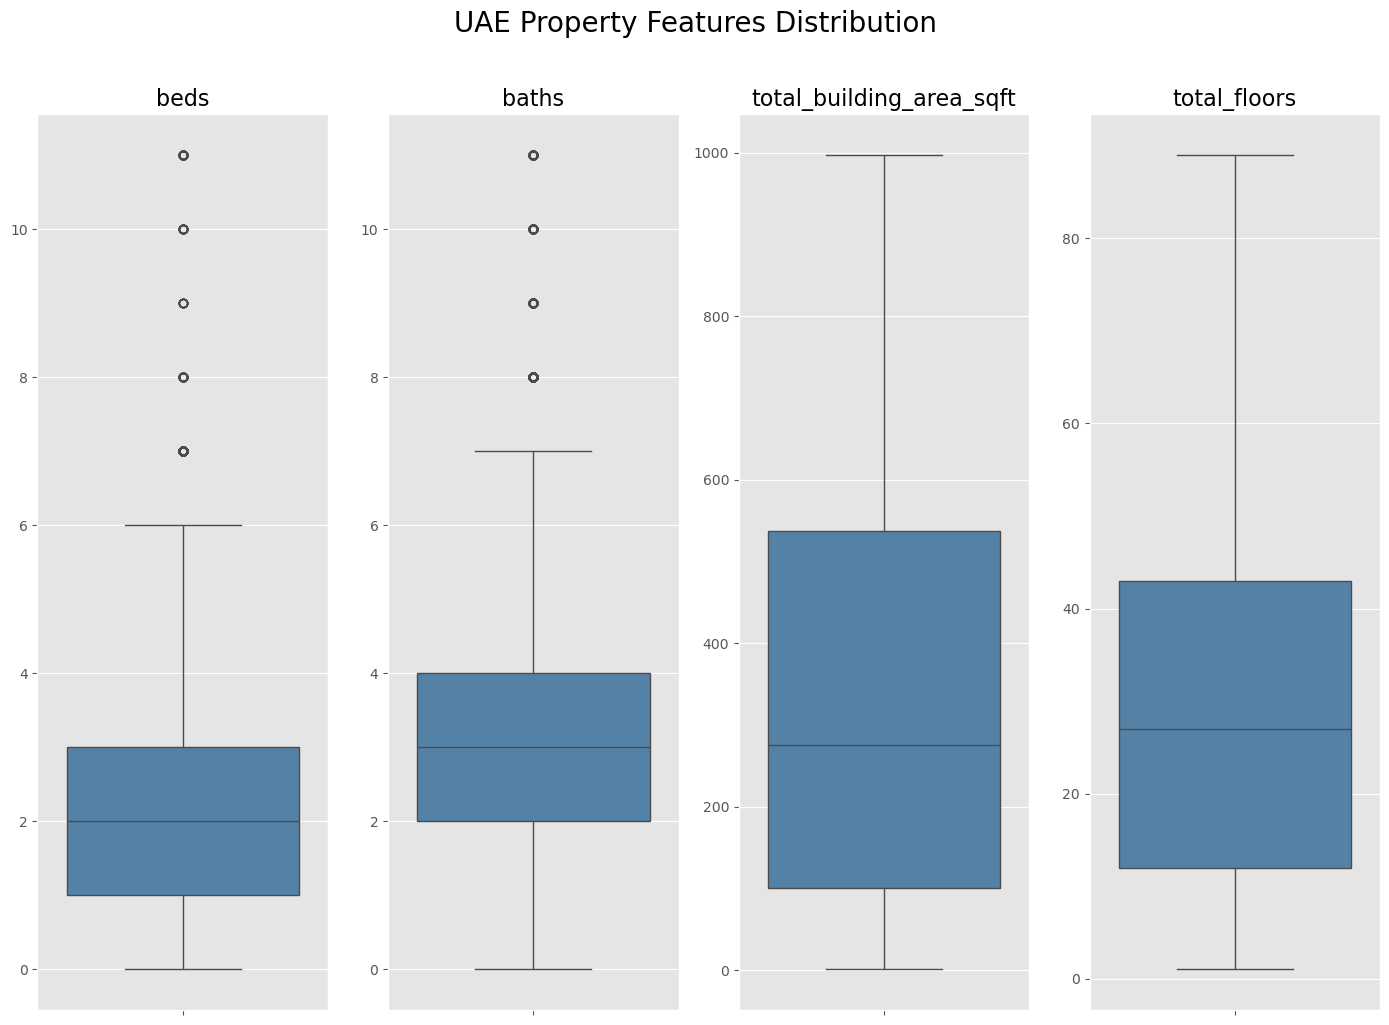

In [ ]:

columns_to_plot = ['beds', 'baths', 'total_building_area_sqft', 'total_floors']

fig, ax = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(14,10))

for i, col in enumerate(columns_to_plot):
    if col in ['total_building_area_sqft', 'total_floors']:
        data = UAE_Real_Estate[UAE_Real_Estate[col] > 0][col]
    else:
        data = UAE_Real_Estate[col]
    
    
    sns.boxplot(y=data, ax=ax[i],color='steelblue')
    ax[i].set_title(col,fontsize=16)
    ax[i].set_ylabel('')

plt.suptitle('UAE Property Features Distribution', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()







In [96]:
type_counts=UAE_Real_Estate['type'].value_counts()
type_counts

type
Apartment               22851
Villa                    4940
Townhouse                2337
Residential Plot          573
Penthouse                 274
Hotel Apartment           155
Residential Building       75
Villa Compound             25
Residential Floor           5
Name: count, dtype: int64

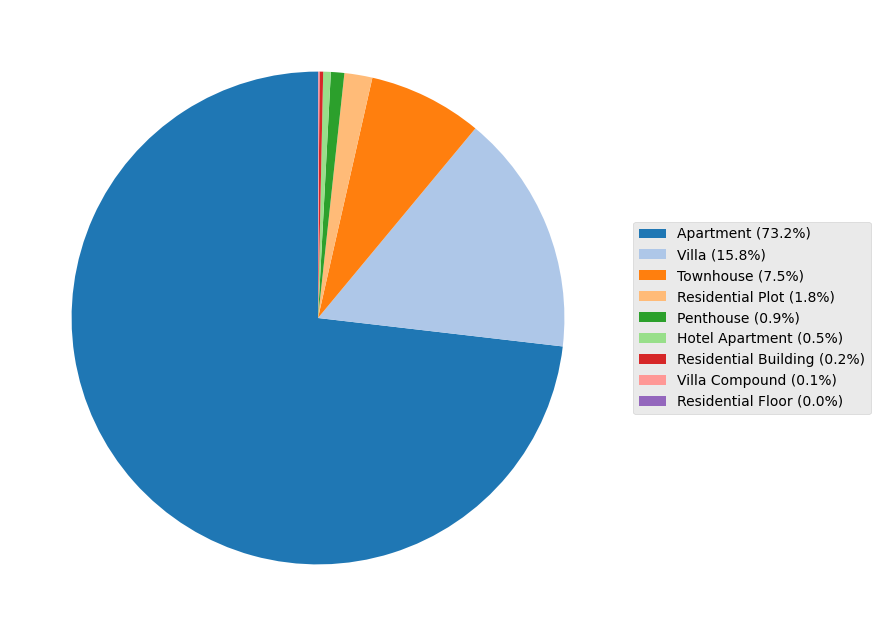

In [97]:
# Plot the pie chart with only colors
plt.figure(figsize=(12,8))
# Calculate percentages
percentages = type_counts / type_counts.sum() * 100

# Create pie (no labels or autopct)
patches,text = plt.pie(type_counts, colors=plt.cm.tab20.colors, startangle=90)

# Add legend with both label + %
labels_with_pct = [f"{label} ({p:.1f}%)" for label, p in zip(type_counts.index, percentages)]
plt.legend(patches, labels_with_pct, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [98]:
furnishing_counts=UAE_Real_Estate['furnishing'].value_counts()
furnishing_counts

furnishing
Unfurnished    23879
Furnished       7356
Name: count, dtype: int64

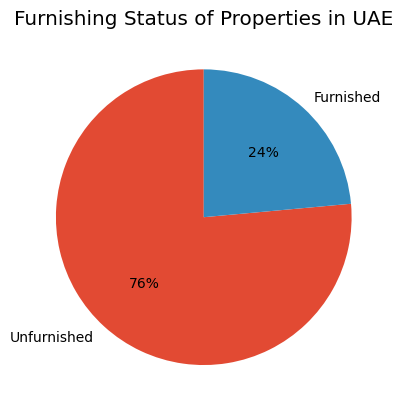

In [99]:
plt.pie(furnishing_counts,startangle=90,autopct='%.0f%%',labels=furnishing_counts.index)
plt.title('Furnishing Status of Properties in UAE')
plt.show()

In [100]:
completion_status_counts =UAE_Real_Estate['completion_status'].value_counts()
completion_status_counts

completion_status
Ready       18710
Off-Plan    12525
Name: count, dtype: int64

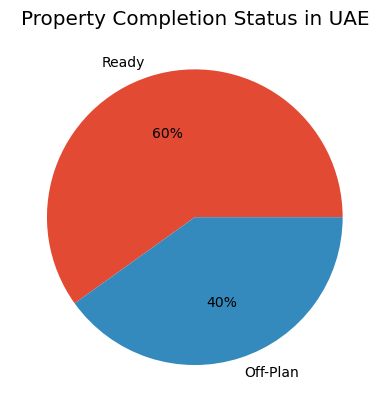

In [101]:
plt.pie(completion_status_counts, labels=completion_status_counts.index, autopct='%1.0f%%')
plt.title('Property Completion Status in UAE')
plt.show()

In [103]:
price_category_counts = UAE_Real_Estate["price_category"].value_counts()
price_category_counts

price_category
High       10551
Average    10419
Medium     10265
Name: count, dtype: int64

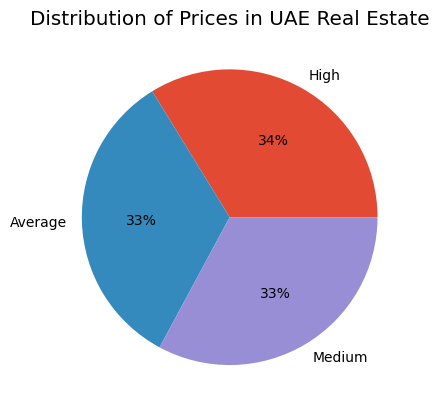

In [104]:
plt.pie(price_category_counts, labels=price_category_counts.index, autopct='%1.0f%%')
plt.title('Distribution of Prices in UAE Real Estate')
plt.show()

In [105]:
combined_df = pd.concat([df_UAE, UAE_Real_Estate], ignore_index=True, sort=False)

In [106]:
combined_df.shape

(33825, 32)

In [107]:
combined_df.describe()

,building_total_floors,apartment_floor,apartment_rooms,beds,baths,price_USD,year,price,average_rent,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,2590.000000,2590.000000,2590.000000,33825.000000,33825.000000,2.590000e+03,2590.000000,3.123500e+04,3.123500e+04,31235.000000,31235.000000,31235.000000,31235.000000,31217.000000,31217.000000
mean,10.722394,3.780695,2.227027,2.057443,2.775137,1.288600e+06,989.563707,3.941360e+06,9.411035e+04,174.141636,13.408100,148.538082,2.353258,25.035569,55.154647
std,18.720891,10.762858,1.625942,1.553898,1.788366,2.560016e+06,985.179635,8.830454e+06,2.699008e+05,349.950416,20.202632,250.375265,4.456912,0.418951,0.491043
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,0.000000,0.000000,1.000000,1.000000,1.000000,2.951375e+05,0.000000,1.100000e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,25.027951,55.135252
50%,0.000000,0.000000,2.000000,2.000000,2.000000,5.127140e+05,1970.000000,2.000000e+06,0.000000e+00,0.000000,0.000000,0.000000,0.000000,25.078641,55.239298
75%,14.000000,0.000000,3.000000,3.000000,4.000000,9.302205e+05,1970.000000,3.693325e+06,1.243045e+05,215.000000,22.000000,226.000000,4.000000,25.189427,55.290669
max,124.000000,202.000000,10.000000,11.000000,11.000000,2.913102e+07,1970.000000,4.825000e+08,2.807952e+07,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


In [108]:
combined_df.columns

Index(['title', 'country', 'address', 'year_of_completion',
       'building_total_floors', 'apartment_floor', 'apartment_rooms', 'beds',
       'baths', 'area_sqm', 'apartment_living_area', 'price_USD', 'image',
       'url', 'year', 'price', 'price_category', 'type', 'furnishing',
       'completion_status', 'post_date', 'average_rent', 'building_name',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'area_name', 'city', 'Latitude', 'Longitude', 'purpose'],
      dtype='object')

In [109]:
combined_df['price_AED'] = combined_df['price']

In [111]:
combined_df['price_in_USD'] = combined_df['price_USD'].fillna(combined_df['price_AED'] * 0.2723)


## 3. Average price by city?

In [112]:
uae_cities = ['Dubai', 'Abu Dhabi', 'Sharjah', 'Ajman', 'Ras Al Khaimah','Umm Al Quwain']
combined_df = combined_df[combined_df['city'].isin(uae_cities)]

In [113]:
combined_df_average=combined_df.groupby('city')['price_in_USD'].median().sort_values(ascending=False)
combined_df_average


city
Dubai             599060.00
Abu Dhabi         571802.77
Ras Al Khaimah    530985.00
Sharjah           432957.00
Umm Al Quwain     351267.00
Ajman             195102.95
Name: price_in_USD, dtype: float64

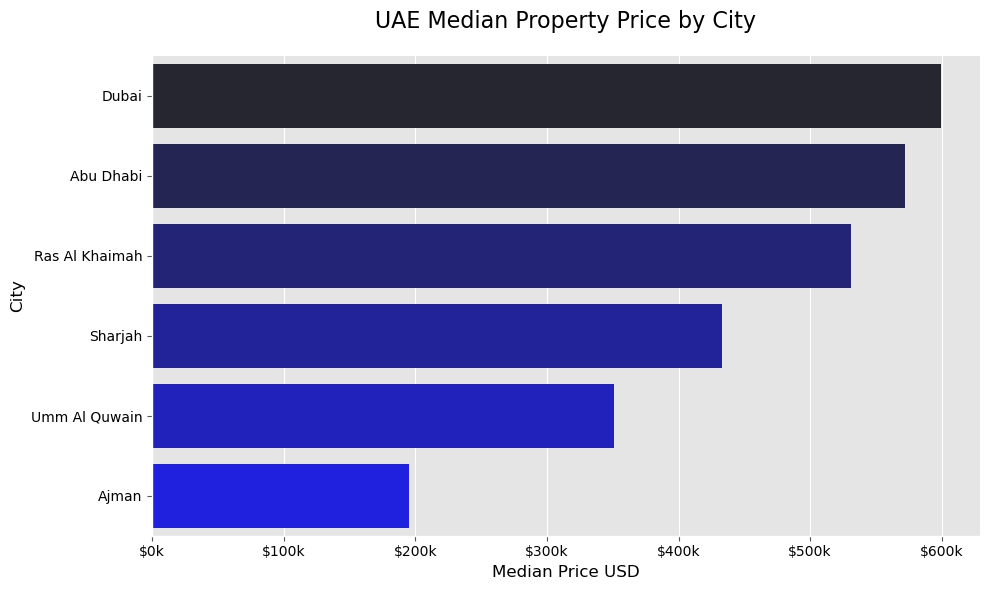

In [ ]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=combined_df_average.values,
            y=combined_df_average.index,
            hue=combined_df_average.index,
            palette='dark:blue',
            legend=False)
ax.tick_params(axis='y', labelcolor='black') 
ax.tick_params(axis='x', labelcolor='black') 

plt.title('UAE Median Property Price by City', fontsize=16, pad=20)
plt.xlabel('Median Price USD',color='black')
plt.ylabel('City' , color='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}k'))

sns.despine()
plt.tight_layout()
plt.show()
